In [7]:
import pygmt
import pandas as pd

Load the data

In [8]:
df = pd.read_csv('Sismos.txt', sep=",", header=None)
df.columns = ["lon", "lat", "depth", "magnitude"]
df.dtypes

lon          float64
lat          float64
depth        float64
magnitude    float64
dtype: object

In [9]:
fig = pygmt.Figure()

Define the region of interest

In [10]:
region = [-180, 180, -90, -50]

Topography and coordinate grid

In [11]:
fig.grdimage('@earth_relief_01m', region=region, projection='D0/-70/-90/-49/12c', cmap='geo')
fig.basemap(region=region, projection='D-0/70/-90/-49/12c', frame=True)

Plot the earthquakes

plot [WARNING]: Cannot use auto-legend -l for variable symbol color. Option -l ignored.


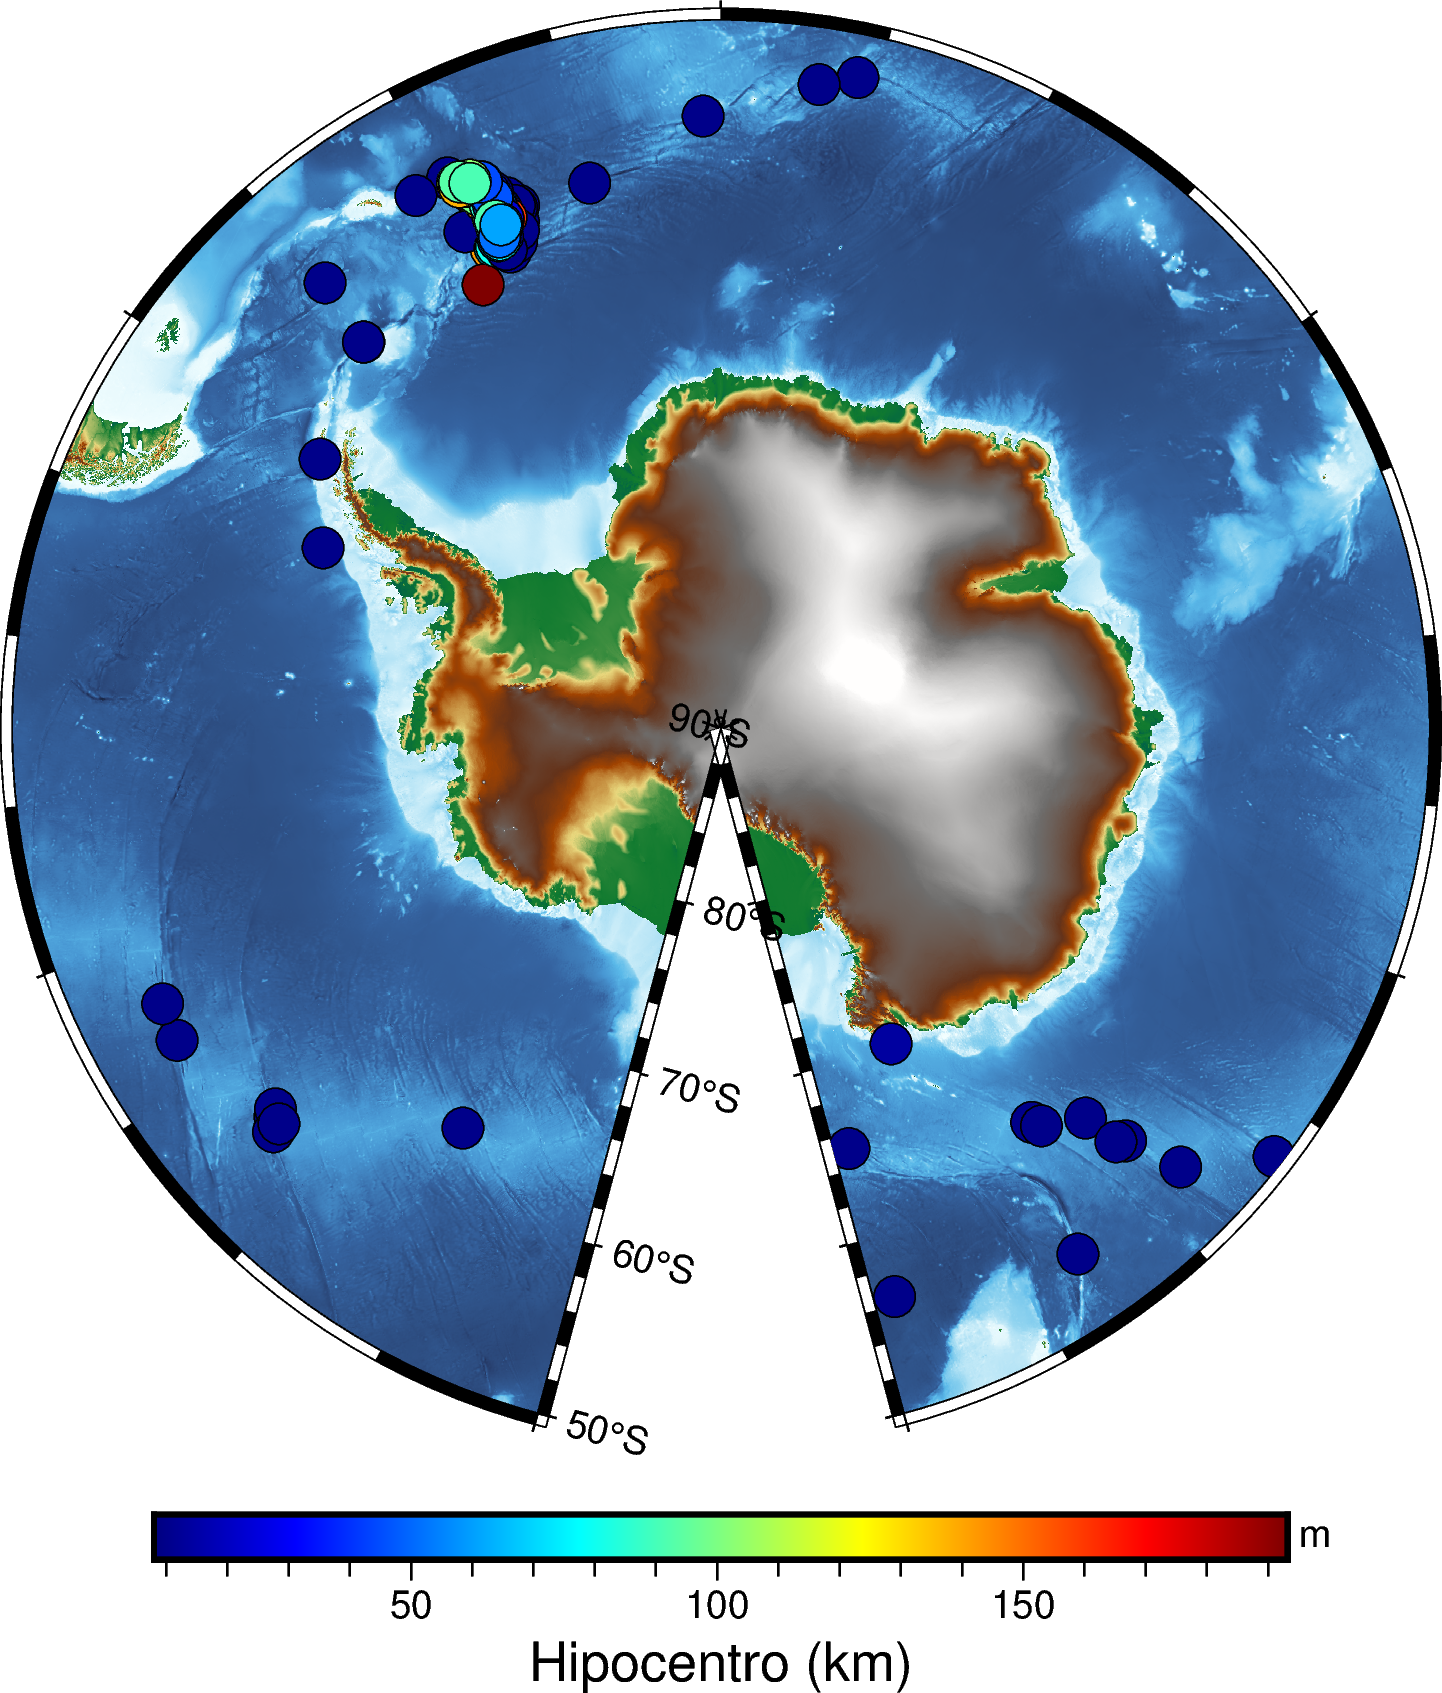

In [12]:
# Create a colormap for depth values
pygmt.makecpt(cmap="jet", series=[df['depth'].min(), df['depth'].max()])

# Plot the earthquakes
fig.plot(
    x=df['lon'],
    y=df['lat'],
    style='c0.35c',
    cmap=True,  # Use colormap for color
    fill=df['depth'],
    pen='black',
    label='Eventos'
)

# Add colorbar with label "Hipocentro (km)"
fig.colorbar(frame=["x+lHipocentro (km)", "y+lm"])

fig.show()